In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나이상 설정할 경우
from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수 - 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 평가함수 - 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀용
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 군집 알고리즘
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 시간 측정을 위한모듈
import datetime
# 저장을 위한 모듈
import pickle

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/train2.csv')
df1

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,GroupNum,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,1,1,B,S
1,0002_01,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,2,1,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False,3,2,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False,3,2,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True,4,1,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,False,9276,1,A,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,False,9278,1,G,P
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,True,9279,1,G,P
8691,9280_01,Europa,False,55 Cancri e,32.0,0.0,1049.0,0.0,353.0,3235.0,False,9280,2,E,P


In [3]:
df2 = pd.read_csv('data/test2.csv')
df2

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNum,Deck,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.00000,0.0,0.0,0.0,0.0,0.0,13,1,G,P
1,0018_01,Earth,False,TRAPPIST-1e,19.00000,0.0,9.0,0.0,2823.0,0.0,18,1,F,P
2,0019_01,Europa,True,55 Cancri e,31.00000,0.0,0.0,0.0,0.0,0.0,19,1,C,P
3,0021_01,Europa,False,TRAPPIST-1e,38.00000,0.0,6652.0,0.0,181.0,585.0,21,1,C,P
4,0023_01,Earth,False,TRAPPIST-1e,20.00000,10.0,0.0,635.0,0.0,0.0,23,1,F,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.00000,0.0,0.0,0.0,0.0,0.0,9266,2,G,P
4273,9269_01,Earth,False,TRAPPIST-1e,42.00000,0.0,847.0,17.0,10.0,144.0,9269,1,F,P
4274,9271_01,Mars,True,55 Cancri e,28.54484,0.0,0.0,0.0,0.0,0.0,9271,1,D,P
4275,9273_01,Europa,False,TRAPPIST-1e,28.54484,0.0,2680.0,0.0,0.0,523.0,9273,1,D,P


In [4]:
# 데이터 프레임 정보 확인
# Dtype에서 Object(문자열)인 컬럼을 확인한다.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Group         8693 non-null   int64  
 12  GroupNum      8693 non-null   int64  
 13  Deck          8693 non-null   object 
 14  Side          8693 non-null   object 
dtypes: bool(2), float64(6), int64(2), object(5)
memory usage: 900.0+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  Group         4277 non-null   int64  
 11  GroupNum      4277 non-null   int64  
 12  Deck          4277 non-null   object 
 13  Side          4277 non-null   object 
dtypes: bool(1), float64(6), int64(2), object(5)
memory usage: 438.7+ KB


In [6]:
# PassengerId 제거
df1.drop('PassengerId', axis=1, inplace=True)
df2.drop('PassengerId', axis=1, inplace=True)

In [7]:
display(df1.columns)
display(df2.columns)

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Group',
       'GroupNum', 'Deck', 'Side'],
      dtype='object')

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'GroupNum',
       'Deck', 'Side'],
      dtype='object')

In [8]:
# 입력과 결과로 나눈다.
X = df1.drop('Transported', axis=1)
y = df1['Transported']

display(X)
display(y)

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNum,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,1,1,B,S
1,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,2,1,F,S
2,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,3,2,A,S
3,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,3,2,A,S
4,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,4,1,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,9276,1,A,P
8689,Earth,True,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,9278,1,G,P
8690,Earth,False,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,9279,1,G,P
8691,Europa,False,55 Cancri e,32.0,0.0,1049.0,0.0,353.0,3235.0,9280,2,E,P


0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

### 데이터 전처리

In [9]:
# 표준화 등을 위해 두 데이터 프레임을 합친다.
data = pd.concat([X, df2])
data.reset_index(inplace=True, drop=True)
data

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNum,Deck,Side
0,Europa,False,TRAPPIST-1e,39.00000,0.0,0.0,0.0,0.0,0.0,1,1,B,S
1,Earth,False,TRAPPIST-1e,24.00000,109.0,9.0,25.0,549.0,44.0,2,1,F,S
2,Europa,False,TRAPPIST-1e,58.00000,43.0,3576.0,0.0,6715.0,49.0,3,2,A,S
3,Europa,False,TRAPPIST-1e,33.00000,0.0,1283.0,371.0,3329.0,193.0,3,2,A,S
4,Earth,False,TRAPPIST-1e,16.00000,303.0,70.0,151.0,565.0,2.0,4,1,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.00000,0.0,0.0,0.0,0.0,0.0,9266,2,G,P
12966,Earth,False,TRAPPIST-1e,42.00000,0.0,847.0,17.0,10.0,144.0,9269,1,F,P
12967,Mars,True,55 Cancri e,28.54484,0.0,0.0,0.0,0.0,0.0,9271,1,D,P
12968,Europa,False,TRAPPIST-1e,28.54484,0.0,2680.0,0.0,0.0,523.0,9273,1,D,P


In [10]:
# Label Encoder
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()
encoder5 = LabelEncoder()
encoder6 = LabelEncoder()

encoder1.fit(data['HomePlanet'])
encoder2.fit(data['CryoSleep'])
encoder3.fit(data['Destination'])
encoder4.fit(data['Deck'])
encoder5.fit(data['Side'])
encoder6.fit(y)

LabelEncoder()

In [11]:
X['HomePlanet'] = encoder1.transform(X['HomePlanet'])
X['CryoSleep'] = encoder2.transform(X['CryoSleep'])
X['Destination'] = encoder3.transform(X['Destination'])
X['Deck'] = encoder4.transform(X['Deck'])
X['Side'] = encoder5.transform(X['Side'])

df2['HomePlanet'] = encoder1.transform(df2['HomePlanet'])
df2['CryoSleep'] = encoder2.transform(df2['CryoSleep'])
df2['Destination'] = encoder3.transform(df2['Destination'])
df2['Deck'] = encoder4.transform(df2['Deck'])
df2['Side'] = encoder5.transform(df2['Side'])

y = encoder6.transform(y)

display(X)
display(df2)
display(y)

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNum,Deck,Side
0,1,0,2,39.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
1,0,0,2,24.0,109.0,9.0,25.0,549.0,44.0,2,1,5,1
2,1,0,2,58.0,43.0,3576.0,0.0,6715.0,49.0,3,2,0,1
3,1,0,2,33.0,0.0,1283.0,371.0,3329.0,193.0,3,2,0,1
4,0,0,2,16.0,303.0,70.0,151.0,565.0,2.0,4,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,0.0,6819.0,0.0,1643.0,74.0,9276,1,0,0
8689,0,1,1,18.0,0.0,0.0,0.0,0.0,0.0,9278,1,6,0
8690,0,0,2,26.0,0.0,0.0,1872.0,1.0,0.0,9279,1,6,0
8691,1,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0,9280,2,4,0


,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNum,Deck,Side
0,0,1,2,27.00000,0.0,0.0,0.0,0.0,0.0,13,1,6,0
1,0,0,2,19.00000,0.0,9.0,0.0,2823.0,0.0,18,1,5,0
2,1,1,0,31.00000,0.0,0.0,0.0,0.0,0.0,19,1,2,0
3,1,0,2,38.00000,0.0,6652.0,0.0,181.0,585.0,21,1,2,0
4,0,0,2,20.00000,10.0,0.0,635.0,0.0,0.0,23,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.00000,0.0,0.0,0.0,0.0,0.0,9266,2,6,0
4273,0,0,2,42.00000,0.0,847.0,17.0,10.0,144.0,9269,1,5,0
4274,2,1,0,28.54484,0.0,0.0,0.0,0.0,0.0,9271,1,3,0
4275,1,0,2,28.54484,0.0,2680.0,0.0,0.0,523.0,9273,1,3,0


array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

### 파생 변수 발생
- 본 데이터는 성능이 높게 나오지 않는 데이터이다.
- 원인이 각 컬럼의 데이터가 결과데이터와의 상관관계가 낮거나 공선성이 심하거나하는 경우이다.
- 결과데이터와 상관 관계가 매우 높은 데이터들을 발생시켜 이용하면 효과를 볼 수도 있다.

In [12]:
# 파생 변수 발생
# 각 컬럼의 데이터를 도착 확률로 바꾼다.
# 입력데이터에 결과 데이터를 붙힌다.
X['Transported'] = y
# 두 데이터 프레임을 합친 데이터 프레임을 생성한다.
data = pd.concat([X,df2])


# 컬럼 이름 목록을 가져온다.
a1 = data.columns
# 컬럼의 이름으로 반복한다.
for c1 in a1 :
    # 컬럼 이름이 결과 데이터라면 넘어간다.
    if c1 == 'Transported':
        continue
    
    # 컬럼의 도착확률로 구해 담아준다.
    data[c1] = data.groupby(c1)['Transported'].transform('mean')
# data.groupby('HomePlanet')['Transported'].transform('mean')
data

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNum,Deck,Side,Transported
0,0.674575,0.322342,0.464113,0.449275,0.633315,0.590909,0.598711,0.639181,0.628025,0.0,0.452445,0.750302,0.460000,0.0
1,0.415106,0.322342,0.464113,0.432099,1.000000,0.214286,0.300000,0.500000,0.300000,1.0,0.452445,0.424819,0.460000,1.0
2,0.674575,0.322342,0.464113,0.510638,0.222222,0.000000,0.598711,0.000000,0.400000,0.0,0.538050,0.496094,0.460000,0.0
3,0.674575,0.322342,0.464113,0.466292,0.633315,0.000000,0.000000,0.000000,0.000000,0.0,0.538050,0.496094,0.460000,0.0
4,0.415106,0.322342,0.464113,0.544218,1.000000,0.500000,0.500000,0.500000,0.414286,1.0,0.452445,0.424819,0.460000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.415106,0.823735,0.464113,0.520270,0.633315,0.590909,0.598711,0.639181,0.628025,NaN,0.538050,0.516217,0.503876,NaN
4273,0.415106,0.322342,0.464113,0.445378,0.633315,0.250000,0.210526,0.480000,0.750000,NaN,0.452445,0.424819,0.503876,NaN
4274,0.523024,0.823735,0.628964,NaN,0.633315,0.590909,0.598711,0.639181,0.628025,NaN,0.452445,0.433054,0.503876,NaN
4275,0.674575,0.322342,0.464113,NaN,0.633315,1.000000,0.598711,0.639181,1.000000,NaN,0.452445,0.433054,0.503876,NaN


In [13]:
# 결과 데이터는 제거한다.
data.drop('Transported', axis=1, inplace=True)
data

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNum,Deck,Side
0,0.674575,0.322342,0.464113,0.449275,0.633315,0.590909,0.598711,0.639181,0.628025,0.0,0.452445,0.750302,0.460000
1,0.415106,0.322342,0.464113,0.432099,1.000000,0.214286,0.300000,0.500000,0.300000,1.0,0.452445,0.424819,0.460000
2,0.674575,0.322342,0.464113,0.510638,0.222222,0.000000,0.598711,0.000000,0.400000,0.0,0.538050,0.496094,0.460000
3,0.674575,0.322342,0.464113,0.466292,0.633315,0.000000,0.000000,0.000000,0.000000,0.0,0.538050,0.496094,0.460000
4,0.415106,0.322342,0.464113,0.544218,1.000000,0.500000,0.500000,0.500000,0.414286,1.0,0.452445,0.424819,0.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.415106,0.823735,0.464113,0.520270,0.633315,0.590909,0.598711,0.639181,0.628025,NaN,0.538050,0.516217,0.503876
4273,0.415106,0.322342,0.464113,0.445378,0.633315,0.250000,0.210526,0.480000,0.750000,NaN,0.452445,0.424819,0.503876
4274,0.523024,0.823735,0.628964,NaN,0.633315,0.590909,0.598711,0.639181,0.628025,NaN,0.452445,0.433054,0.503876
4275,0.674575,0.322342,0.464113,NaN,0.633315,1.000000,0.598711,0.639181,1.000000,NaN,0.452445,0.433054,0.503876


In [14]:
# 각 행별, 평균, 중간값, 최대, 최소를 구한다.
data['Mean'] = data.mean(axis=1)
data['Median'] = data.median(axis=1)
data['Max'] = data.max(axis=1)
data['Min'] = data.min(axis=1)
data

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNum,Deck,Side,Mean,Median,Max,Min
0,0.674575,0.322342,0.464113,0.449275,0.633315,0.590909,0.598711,0.639181,0.628025,0.0,0.452445,0.750302,0.460000,0.512553,0.551731,0.750302,0.000000
1,0.415106,0.322342,0.464113,0.432099,1.000000,0.214286,0.300000,0.500000,0.300000,1.0,0.452445,0.424819,0.460000,0.483478,0.442272,1.000000,0.214286
2,0.674575,0.322342,0.464113,0.510638,0.222222,0.000000,0.598711,0.000000,0.400000,0.0,0.538050,0.496094,0.460000,0.360519,0.430000,0.674575,0.000000
3,0.674575,0.322342,0.464113,0.466292,0.633315,0.000000,0.000000,0.000000,0.000000,0.0,0.538050,0.496094,0.460000,0.311906,0.391171,0.674575,0.000000
4,0.415106,0.322342,0.464113,0.544218,1.000000,0.500000,0.500000,0.500000,0.414286,1.0,0.452445,0.424819,0.460000,0.538256,0.482057,1.000000,0.322342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.415106,0.823735,0.464113,0.520270,0.633315,0.590909,0.598711,0.639181,0.628025,NaN,0.538050,0.516217,0.503876,0.572626,0.572626,0.823735,0.415106
4273,0.415106,0.322342,0.464113,0.445378,0.633315,0.250000,0.210526,0.480000,0.750000,NaN,0.452445,0.424819,0.503876,0.445993,0.445993,0.750000,0.210526
4274,0.523024,0.823735,0.628964,NaN,0.633315,0.590909,0.598711,0.639181,0.628025,NaN,0.452445,0.433054,0.503876,0.586840,0.594810,0.823735,0.433054
4275,0.674575,0.322342,0.464113,NaN,0.633315,1.000000,0.598711,0.639181,1.000000,NaN,0.452445,0.433054,0.503876,0.611056,0.604884,1.000000,0.322342


In [15]:
# 위에서 구한 데이터 프레임을 학습용과 예측용으로 나눈다.
# 학습용 데이터의 개수를 구한다.
train_len = len(X)

# data를 학습용과 예측용으로나눈다.
a1 = data.iloc[:train_len]
a2 = data.iloc[train_len:]

# 학습용 데이터와 예측용 데이터에 통계값 컬럼을 추가한다.
X['Mean'] = a1['Mean'].values
X['Median'] = a1['Median'].values
X['Max'] = a1['Max'].values
X['Min'] = a1['Min'].values

df2['Mean'] = a2['Mean'].values
df2['Median'] = a2['Median'].values
df2['Max'] = a2['Max'].values
df2['Min'] = a2['Min'].values

X.drop('Transported', axis=1, inplace=True)

display(X)
display(df2)

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNum,Deck,Side,Mean,Median,Max,Min
0,1,0,2,39.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0.512553,0.551731,0.750302,0.000000
1,0,0,2,24.0,109.0,9.0,25.0,549.0,44.0,2,1,5,1,0.483478,0.442272,1.000000,0.214286
2,1,0,2,58.0,43.0,3576.0,0.0,6715.0,49.0,3,2,0,1,0.360519,0.430000,0.674575,0.000000
3,1,0,2,33.0,0.0,1283.0,371.0,3329.0,193.0,3,2,0,1,0.311906,0.391171,0.674575,0.000000
4,0,0,2,16.0,303.0,70.0,151.0,565.0,2.0,4,1,5,1,0.538256,0.482057,1.000000,0.322342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,0.0,6819.0,0.0,1643.0,74.0,9276,1,0,0,0.409977,0.498047,0.674575,0.000000
8689,0,1,1,18.0,0.0,0.0,0.0,0.0,0.0,9278,1,6,0,0.523484,0.519851,0.823735,0.000000
8690,0,0,2,26.0,0.0,0.0,1872.0,1.0,0.0,9279,1,6,0,0.566164,0.510047,1.000000,0.322342
8691,1,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0,9280,2,4,0,0.463666,0.500000,0.674575,0.000000


,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNum,Deck,Side,Mean,Median,Max,Min
0,0,1,2,27.00000,0.0,0.0,0.0,0.0,0.0,13,1,6,0,0.562999,0.562999,0.823735,0.415106
1,0,0,2,19.00000,0.0,9.0,0.0,2823.0,0.0,18,1,5,0,0.466184,0.465149,0.633315,0.214286
2,1,1,0,31.00000,0.0,0.0,0.0,0.0,0.0,19,1,2,0,0.607063,0.628025,0.823735,0.410891
3,1,0,2,38.00000,0.0,6652.0,0.0,181.0,585.0,21,1,2,0,0.435500,0.458279,0.700125,0.000000
4,0,0,2,20.00000,10.0,0.0,635.0,0.0,0.0,23,1,5,0,0.470066,0.454874,0.639181,0.322342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.00000,0.0,0.0,0.0,0.0,0.0,9266,2,6,0,0.572626,0.572626,0.823735,0.415106
4273,0,0,2,42.00000,0.0,847.0,17.0,10.0,144.0,9269,1,5,0,0.445993,0.445993,0.750000,0.210526
4274,2,1,0,28.54484,0.0,0.0,0.0,0.0,0.0,9271,1,3,0,0.586840,0.594810,0.823735,0.433054
4275,1,0,2,28.54484,0.0,2680.0,0.0,0.0,523.0,9273,1,3,0,0.611056,0.604884,1.000000,0.322342


In [16]:
data = pd.concat([X, df2])

# 표준화
scaler1 = StandardScaler()
scaler1.fit(data)

X = scaler1.transform(X)
X2 = scaler1.transform(df2)

display(X)
display(X2)

array([[ 0.4217068 , -0.75223519,  0.62579534, ...,  0.45764693,
        -0.27729709, -1.12757505],
       [-0.83105022, -0.75223519,  0.62579534, ..., -0.99365852,
         1.35414384,  0.01082631],
       [ 0.4217068 , -0.75223519,  0.62579534, ..., -1.15637228,
        -0.77206922, -1.12757505],
       ...,
       [-0.83105022, -0.75223519,  0.62579534, ..., -0.0950445 ,
         1.35414384,  0.58488144],
       [ 0.4217068 , -0.75223519, -1.81527701, ..., -0.22825134,
        -0.77206922, -1.12757505],
       [ 0.4217068 , -0.75223519,  0.62579534, ..., -0.07016247,
         1.35414384,  0.20055987]])

array([[-0.83105022,  1.32937147,  0.62579534, ...,  0.60703909,
         0.20249275,  1.07769408],
       [-0.83105022, -0.75223519,  0.62579534, ..., -0.69033798,
        -1.04164318,  0.01082631],
       [ 0.4217068 ,  1.32937147, -1.81527701, ...,  1.46922188,
         0.20249275,  1.05530017],
       ...,
       [ 1.67446381,  1.32937147, -1.81527701, ...,  1.02882471,
         0.20249275,  1.1730436 ],
       [ 0.4217068 , -0.75223519,  0.62579534, ...,  1.16238604,
         1.35414384,  0.58488144],
       [-0.83105022,  1.32937147, -0.59474084, ...,  0.67015199,
         0.20249275,  1.07769408]])

In [17]:
# 학습용과 검증용으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

### 기본모델 사용하기

In [18]:
# KFold 생성
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [19]:
# 사용할 모델들
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list1= [
    ('m1', KNeighborsClassifier()),
    ('m2', LogisticRegression(random_state=1)),
    ('m3', SVC(random_state=1, probability=True)),
    ('m4', DecisionTreeClassifier(random_state=1)),
    ('m5', RandomForestClassifier(random_state=1)),
    ('m6', AdaBoostClassifier(random_state=1)),
    ('m7', GradientBoostingClassifier(random_state=1)),
    ('m8', LGBMClassifier(random_state=1)),
    ('m9', XGBClassifier(random_state=1, silent=True, verbosity=0))
]
# 배깅 운영방식은 위에서 사용한 앙상블, 부스팅들이 사용하고 있다.
# 보팅 운영방식도 테스트해보기 위해 사용한다.
# 매개변수 voting은 투표방식을 설정한다 (hard, soft)
model10 = VotingClassifier(estimators=model_list1, voting='hard')

model_list2 = [
    ('m10', KNeighborsClassifier()),
    ('m20', LogisticRegression(random_state=1)),
    ('m30', SVC(random_state=1, probability=True)),
    ('m40', DecisionTreeClassifier(random_state=1)),
    ('m50', RandomForestClassifier(random_state=1)),
    ('m60', AdaBoostClassifier(random_state=1)),
    ('m70', GradientBoostingClassifier(random_state=1)),
    ('m80', LGBMClassifier(random_state=1)),
    ('m90', XGBClassifier(random_state=1, silent=True, verbosity=0))
]

model11 = VotingClassifier(estimators=model_list2, voting='soft')

In [20]:
# 성능 값을 담을 리스트
score_list = []
# 학습 모델의 이름을 담을 리스트
model_name_list = []
# 최적으로 튜닝된 학습 모델을 담을 리스트
best_model_list = []

In [21]:
# 교차 검증을 수행할 학습 모델 리스트
check_list = [
    model1, model2, model3, model4, model5, model6, model7,
    model8, model9, model10, model11
]
# 모델의 이름
check_name_list = [
    'KNN (Basic)', 'LogisticRegression (Basic)', 'SVM (Basic)',
    'DecisionTree (Basic)', 'RandomForest (Basic)', 'AdaBoost (Basic)',
    'GradientBoost (Basic)', 'LGBM (Basic)', 'XGBoost (Basic)',
    'Voting (Hard) (Basic)', 'Voting (Soft) (Basic)'
]

In [22]:
# 교차 검증
for idx, ml in enumerate(check_list) :
    score = cross_val_score(ml, X_train, y_train, scoring='f1', cv=kfold)
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 출력한다.
    print(f'{check_name_list[idx]} : {score.mean()}')
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 리스트에 담는다.
    score_list.append(score.mean())
    model_name_list.append(check_name_list[idx])
    best_model_list.append(ml)

KNN (Basic) : 0.9658473108214451
LogisticRegression (Basic) : 0.9705387693953463
SVM (Basic) : 0.9681796365550192
DecisionTree (Basic) : 0.958568971772854
RandomForest (Basic) : 0.9693428991964034
AdaBoost (Basic) : 0.9656626011126048
GradientBoost (Basic) : 0.9668032104439088
LGBM (Basic) : 0.965469201038261
XGBoost (Basic) : 0.966057607725746
Voting (Hard) (Basic) : 0.9687932095950732
Voting (Soft) (Basic) : 0.9690747174670327


### 하이퍼 파라미터 튜닝

In [23]:
# 튜닝하기 위해 사용할 파라미터 후보 값
parameter_list = [
    # KNN
    {
        # 확인할 주변 이웃의 개수
        'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # LogisticRegrssion
    {
        # 규제의 종류
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        # 규제의 강도
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # SVM (규제의 종류를 l2만 사용한다.)
    {
        # 규제의 강도
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # DecisionTree
    {
        # 생성될 최대 질문 깊이. None은 무한대
        'max_depth' :[None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # GradientBoost
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # LGBM
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # XGBoost
    {
        # 내부에서 사용할 알고리즘 종류(gbtree : 결정트리, gblinear : 선형모델)
        'booster' : ['gbtree', 'gblinear'],
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
]

In [24]:
# 사용할 모델들
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)


In [25]:
# 튜닝을 수행할 학습 모델 리스트
check_list = [
    model1, model2, model3, model4, model5, model6, model7,
    model8, model9
]
# 모델의 이름
check_name_list = [
    'KNN (Tuning)', 'LogisticRegression (Tuning)', 'SVM (Tuning)',
    'DecisionTree (Tuning)', 'RandomForest (Tuning)', 'AdaBoost (Tuning)',
    'GradientBoost (Tuning)', 'LGBM (Tuning)', 'XGBoost (Tuning)'
]

In [26]:
# 하이퍼 파라미터 튜닝
for idx, ml in enumerate(check_list) :
    grid1 = GridSearchCV(ml, param_grid=parameter_list[idx], scoring='f1', cv=kfold)
    grid1.fit(X_train, y_train)
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 리스트에 담는다.
    score_list.append(grid1.best_score_)
    model_name_list.append(check_name_list[idx])
    best_model_list.append(grid1.best_estimator_)
    
    print(f'{check_name_list[idx]} : {grid1.best_score_}')
    print(grid1.best_params_)

KNN (Tuning) : 0.9663452310107111
{'n_neighbors': 7}
LogisticRegression (Tuning) : 0.9705387693953463
{'C': 1, 'penalty': 'l2'}
SVM (Tuning) : 0.9693724118846541
{'C': 10}
DecisionTree (Tuning) : 0.9690525012104168
{'max_depth': 7}
RandomForest (Tuning) : 0.9699637956954608
{'n_estimators': 50}
AdaBoost (Tuning) : 0.9672079540817317
{'learning_rate': 1, 'n_estimators': 100}
GradientBoost (Tuning) : 0.9681260724320577
{'learning_rate': 0.1, 'n_estimators': 50}
LGBM (Tuning) : 0.9677475512188612
{'learning_rate': 0.01, 'n_estimators': 300}
XGBoost (Tuning) : 0.9703652444522669
{'booster': 'gblinear', 'learning_rate': 0.1, 'n_estimators': 300}


In [27]:
model_list1= [
    ('m1', best_model_list[11]),
    ('m2', best_model_list[12]),
    ('m3', best_model_list[13]),
    ('m4', best_model_list[14]),
    ('m5', best_model_list[15]),
    ('m6', best_model_list[16]),
    ('m7', best_model_list[17]),
    ('m8', best_model_list[18]),
    ('m9', best_model_list[19])
]
# 배깅 운영방식은 위에서 사용한 앙상블, 부스팅들이 사용하고 있다.
# 보팅 운영방식도 테스트해보기 위해 사용한다.
# 매개변수 voting은 투표방식을 설정한다 (hard, soft)
model10 = VotingClassifier(estimators=model_list1, voting='hard')

model_list2 = [
    ('m10', best_model_list[11]),
    ('m20', best_model_list[12]),
    ('m30', best_model_list[13]),
    ('m40', best_model_list[14]),
    ('m50', best_model_list[15]),
    ('m60', best_model_list[16]),
    ('m70', best_model_list[17]),
    ('m80', best_model_list[18]),
    ('m90', best_model_list[19])
]

model11 = VotingClassifier(estimators=model_list2, voting='soft')

In [28]:
# 튜닝된 모델로 구성된 보팅 모델들을 교차 검증한다.
score1 = cross_val_score(model10, X_train, y_train, scoring='f1', cv=kfold)
score2 = cross_val_score(model11, X_train, y_train, scoring='f1', cv=kfold)

score_list.append(score1.mean())
score_list.append(score2.mean())

model_name_list.append('Voting (Hard) (Tuning)')
model_name_list.append('Voting (Soft) (Tuning)')

best_model_list.append(model10)
best_model_list.append(model11)

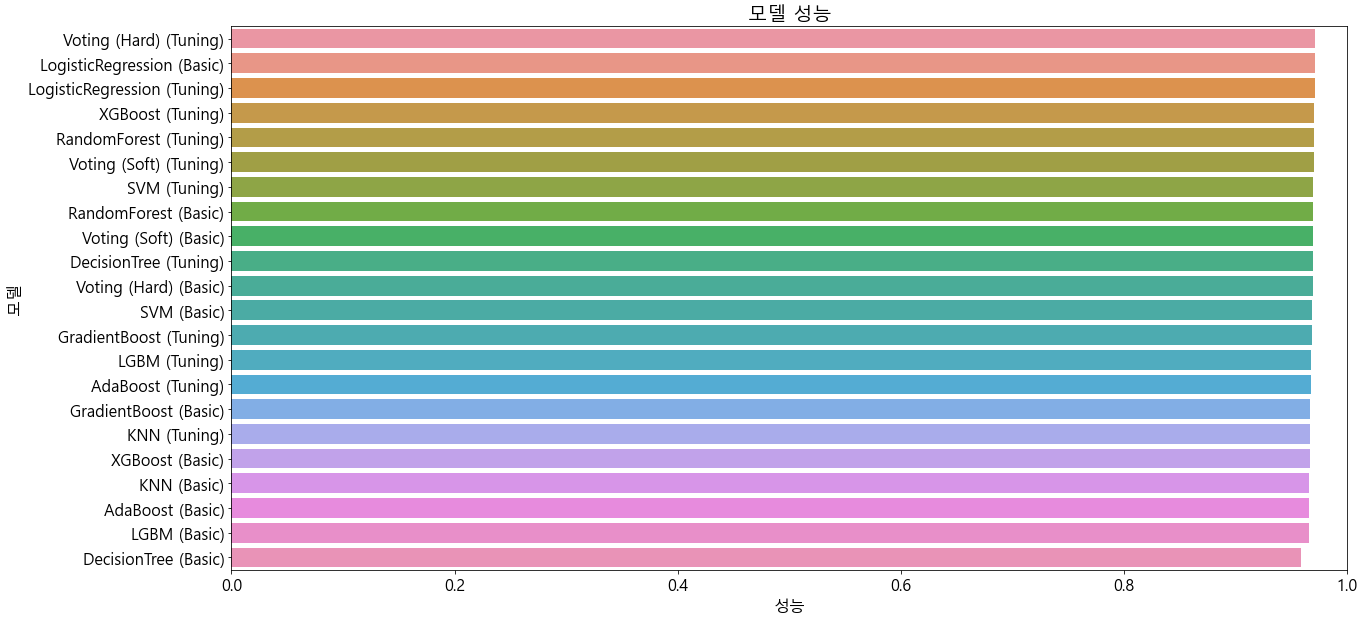

In [29]:
# 결과를 시각화한다.
d1 = {
    'model_name' : model_name_list,
    'score' : score_list
}

result_df = pd.DataFrame(d1)
result_df.sort_values(by='score', ascending=False, inplace=True)

sns.barplot(data=result_df, x='score', y='model_name')
plt.title('모델 성능')
plt.xlabel('성능')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

In [30]:
# 각 모델로 부터 검증 데이터에 대한 평가를 실시한다.
# 전체 모델을 X_train으로 학습을 진행한다.
for ml in best_model_list :
    ml.fit(X_train, y_train)

In [31]:
# 검증 데이터를 통해 예측 결과를 가져온다.
predict_list = []

for ml in best_model_list :
    pred = ml.predict(X_test)
    predict_list.append(pred)

In [32]:
# 정확도를 측정해본다.
accuray_list = []

for pred in predict_list :
    r1 = accuracy_score(pred, y_test)
    accuray_list.append(r1)

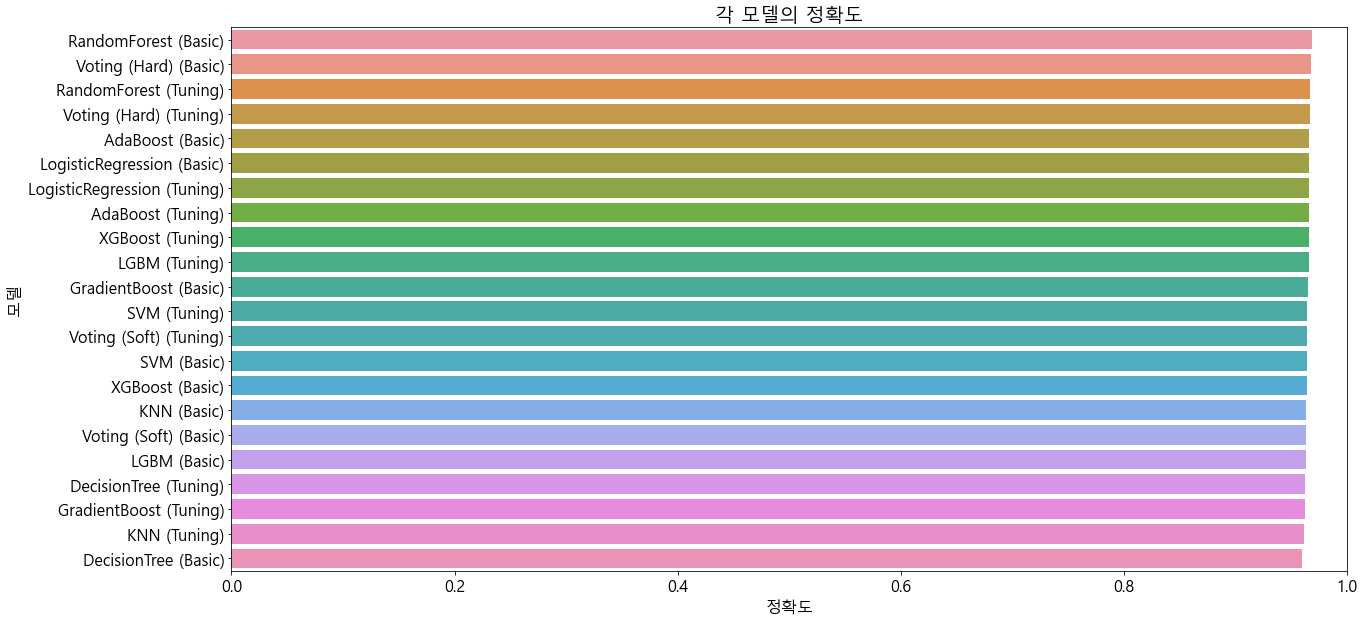

In [33]:
# 정확도를 시각화한다.
d100 = {
    'model_name' : model_name_list,
    'accuracy' : accuray_list
}

df100 = pd.DataFrame(d100)
df100.sort_values(by='accuracy', ascending=False, inplace=True)

sns.barplot(data=df100, x='accuracy', y='model_name')
plt.title('각 모델의 정확도')
plt.xlabel('정확도')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

In [34]:
# 각 학습 모델별 검증 데이터에 대한 예측 확률 값을 가져온다.
proba_list = []

for idx, ml in enumerate(best_model_list) :
    # Hard Voting은 확률 값을 구할 수 없기 때문에 제외한다.
    if idx == 9 or idx == 20 :
        proba_list.append(None)
        continue
    
    proba = ml.predict_proba(X_test)
    proba_list.append(proba)

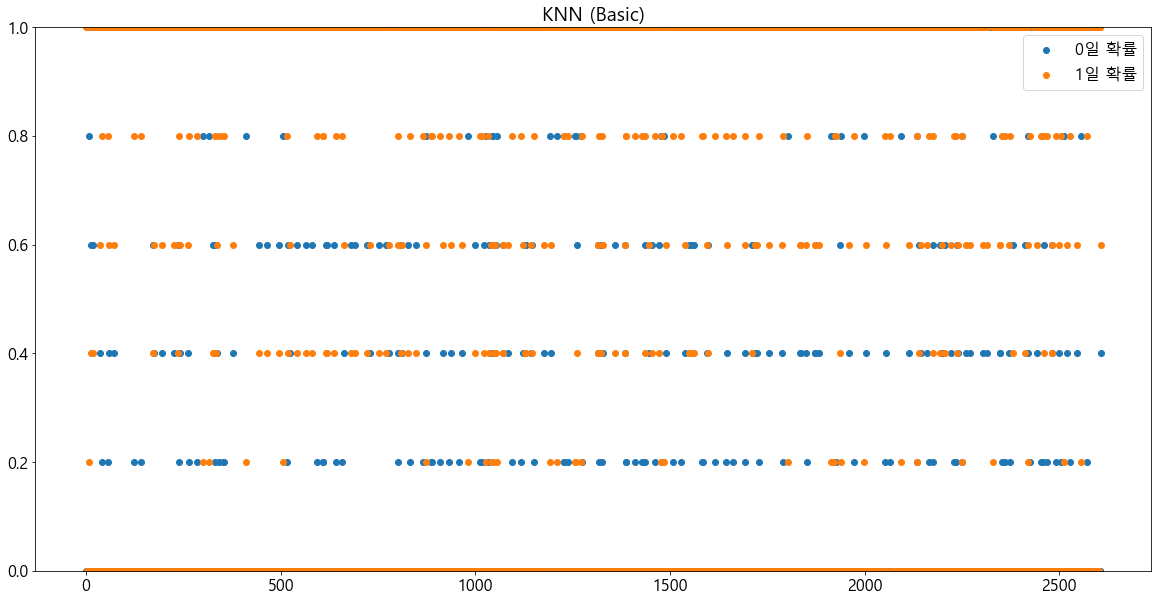

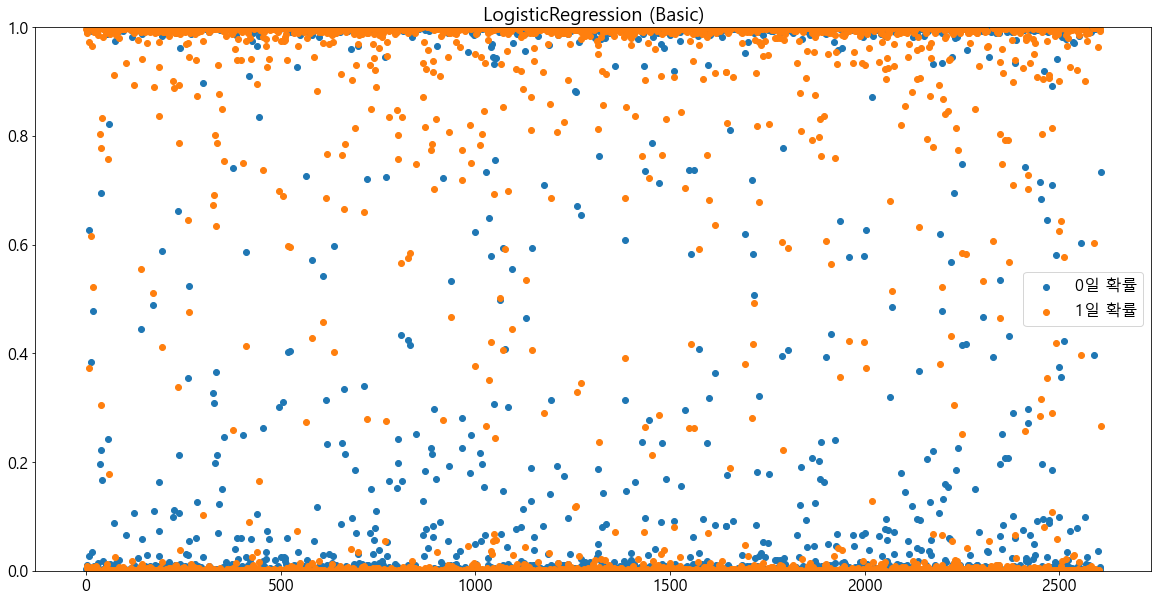

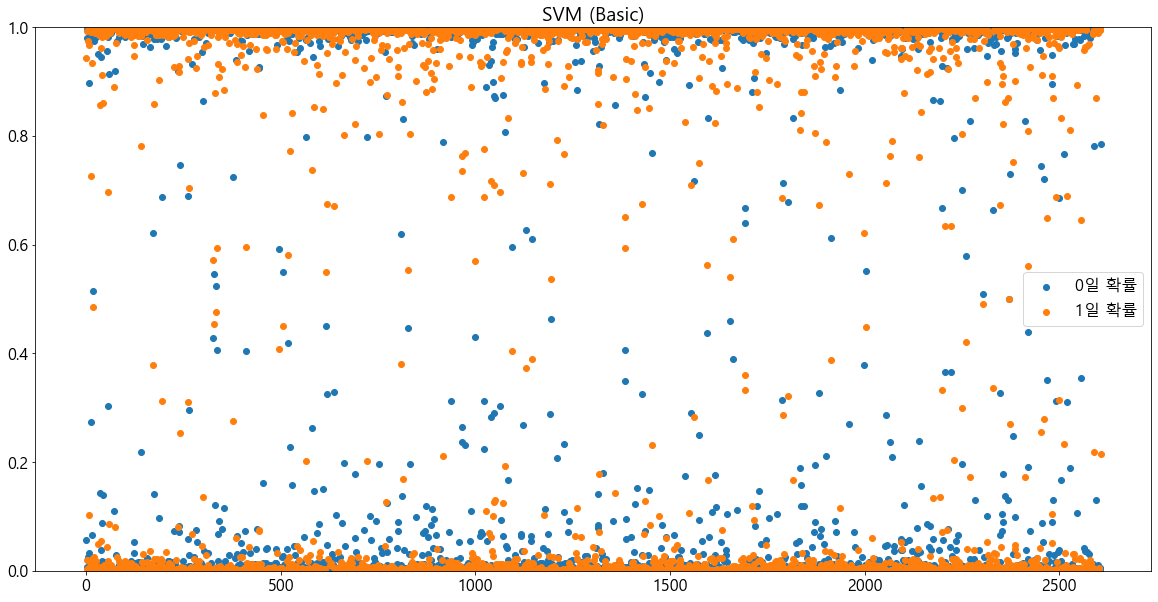

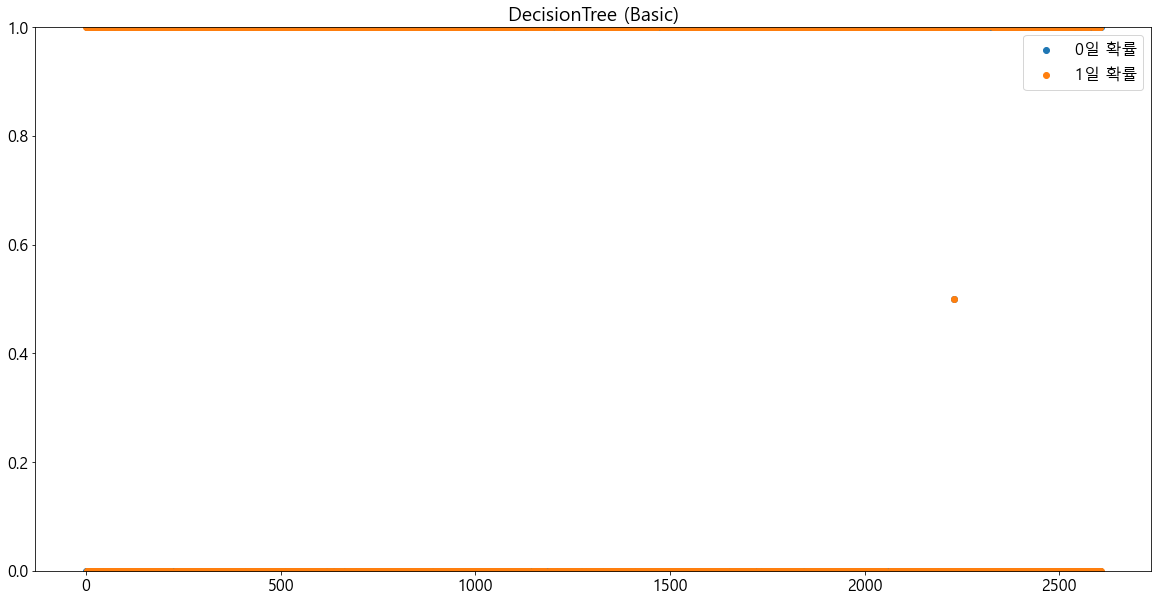

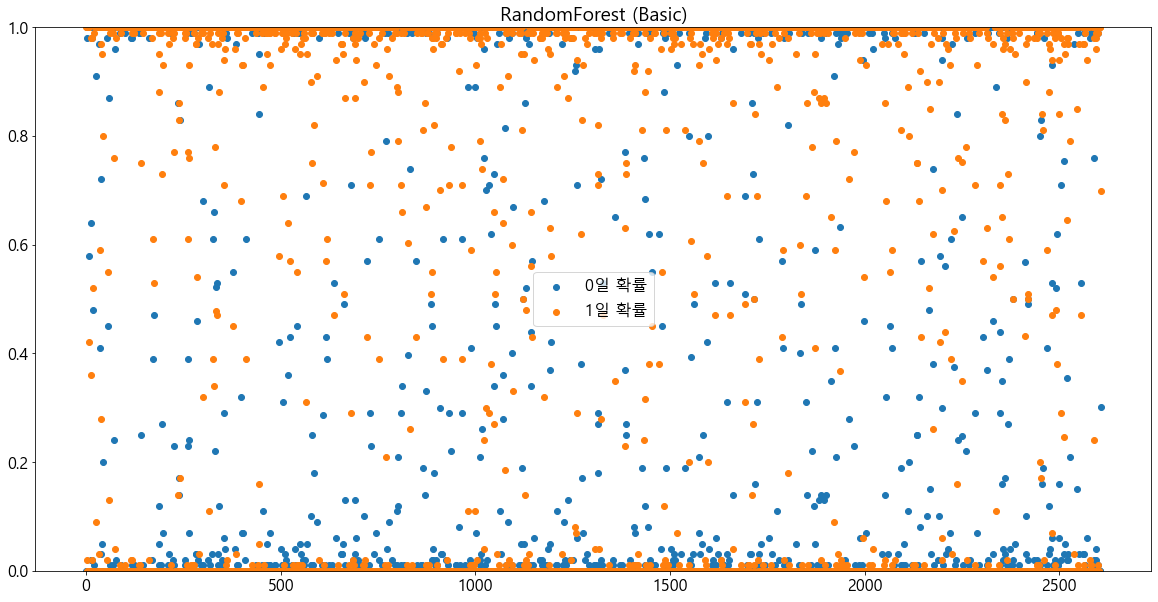

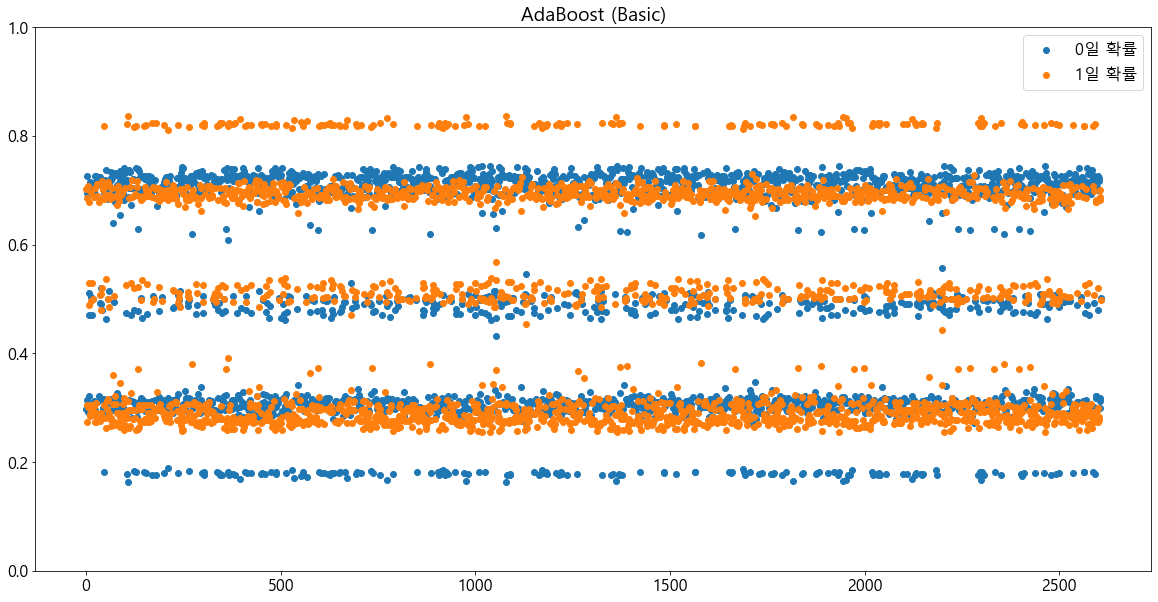

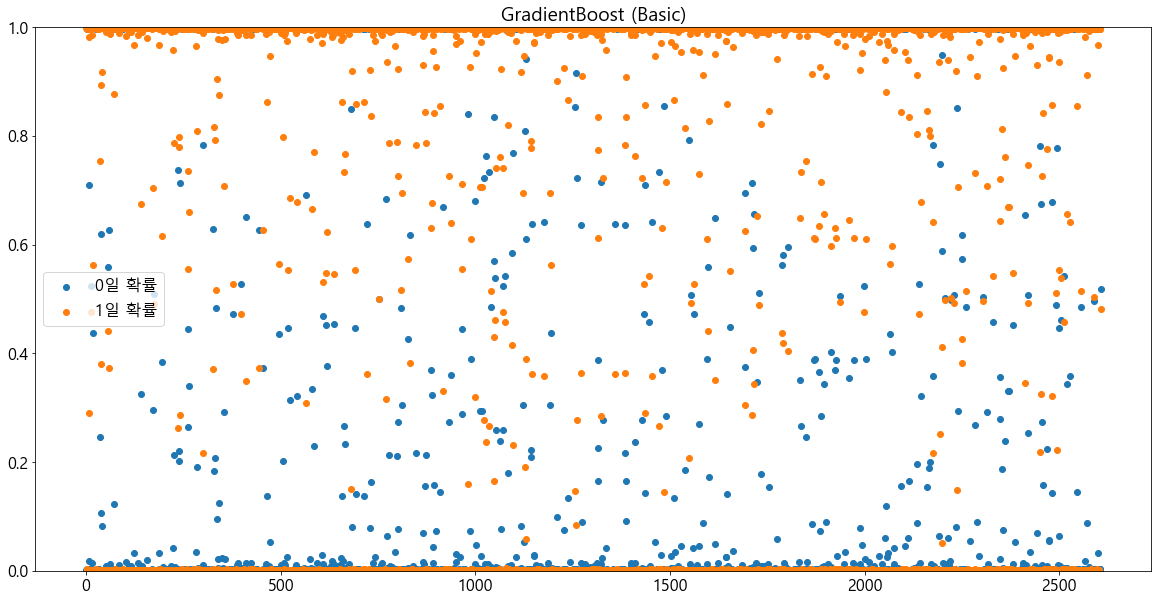

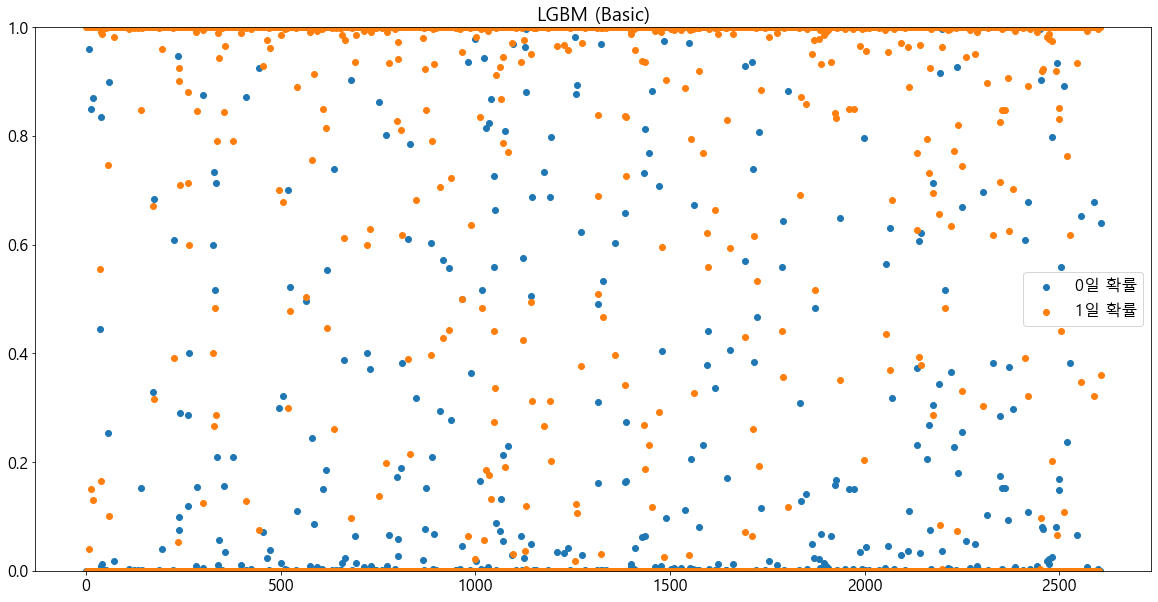

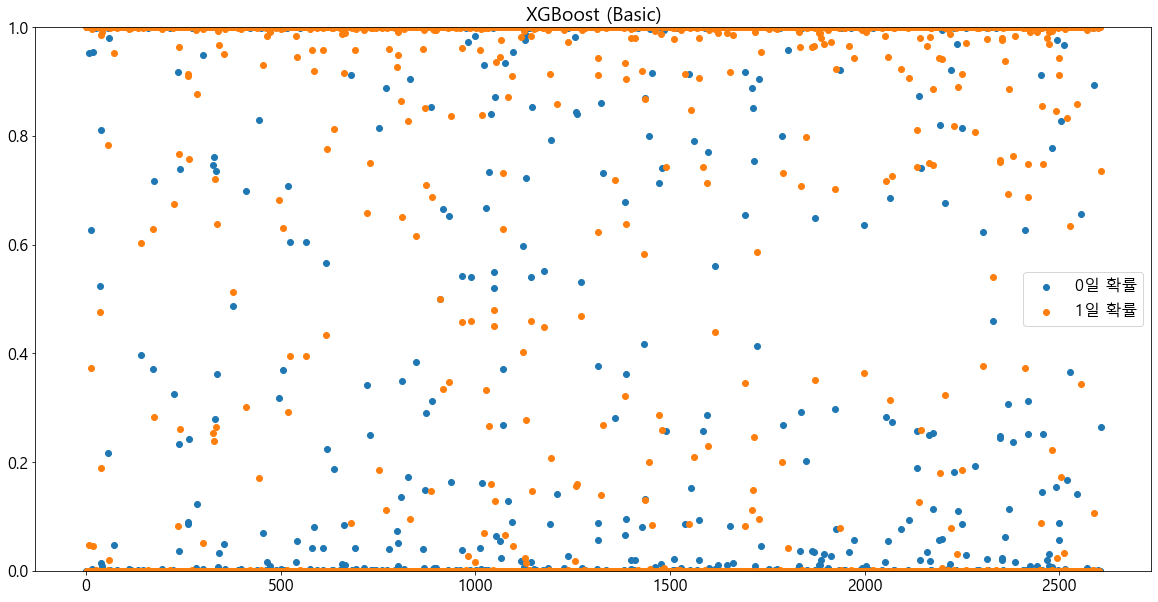

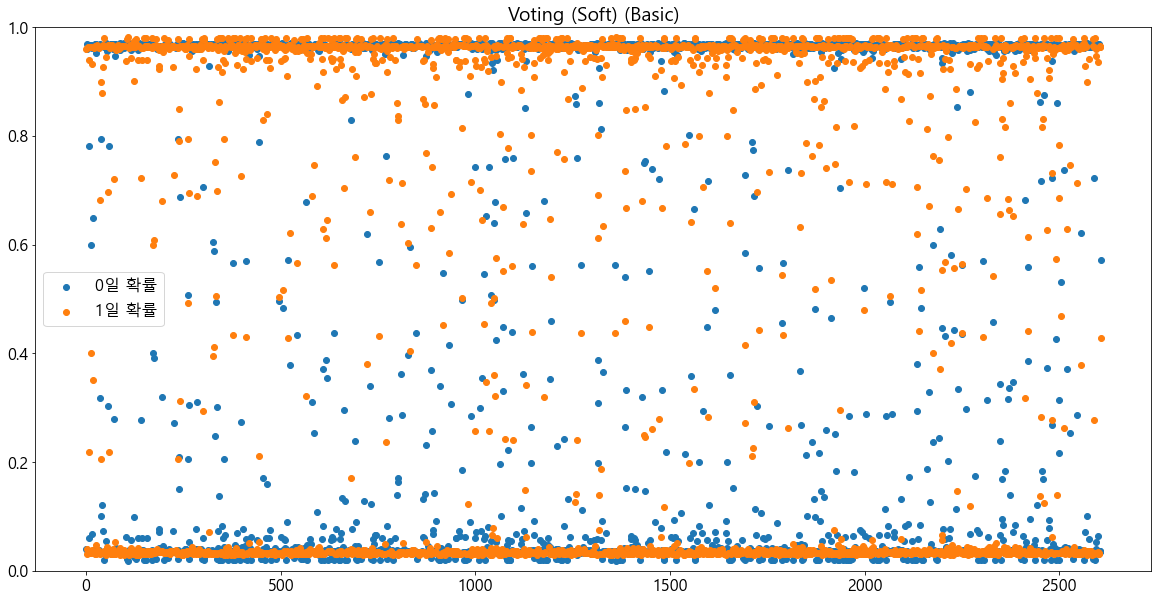

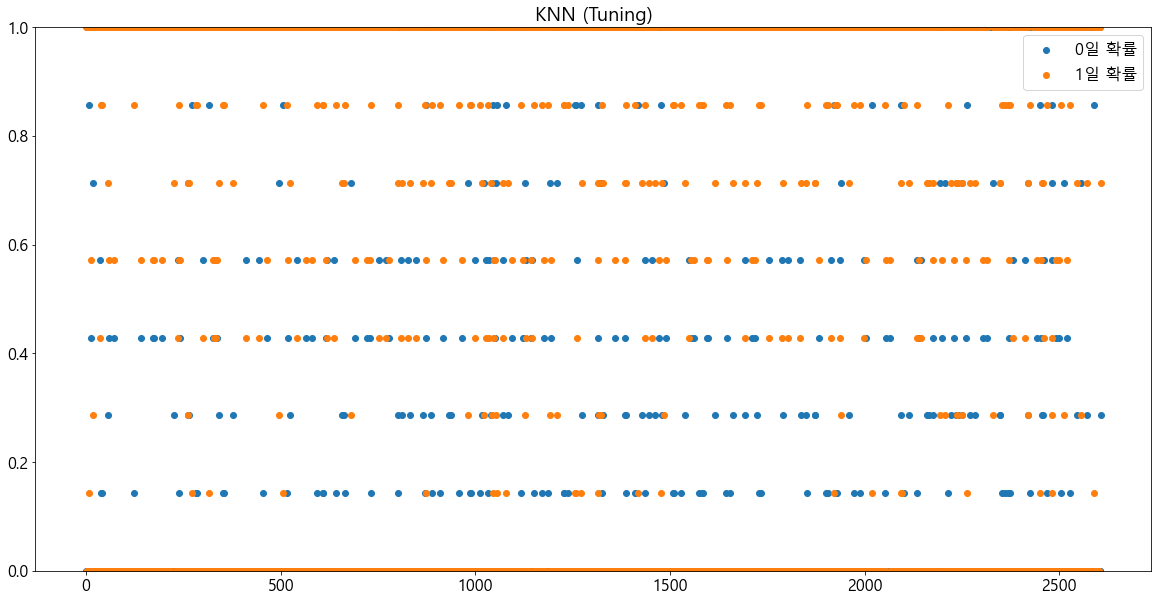

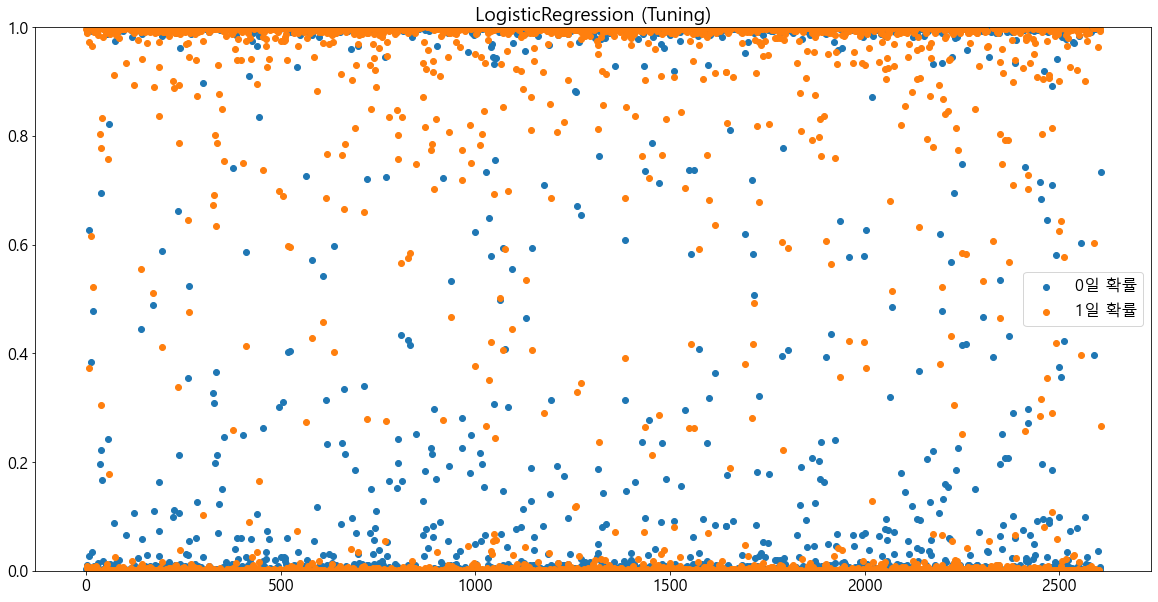

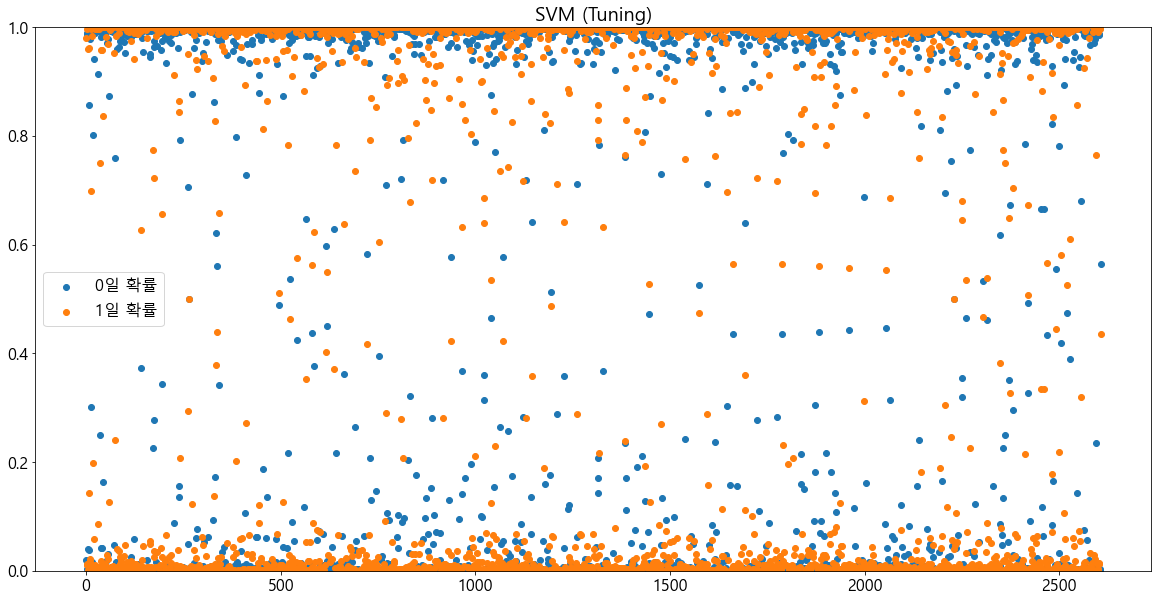

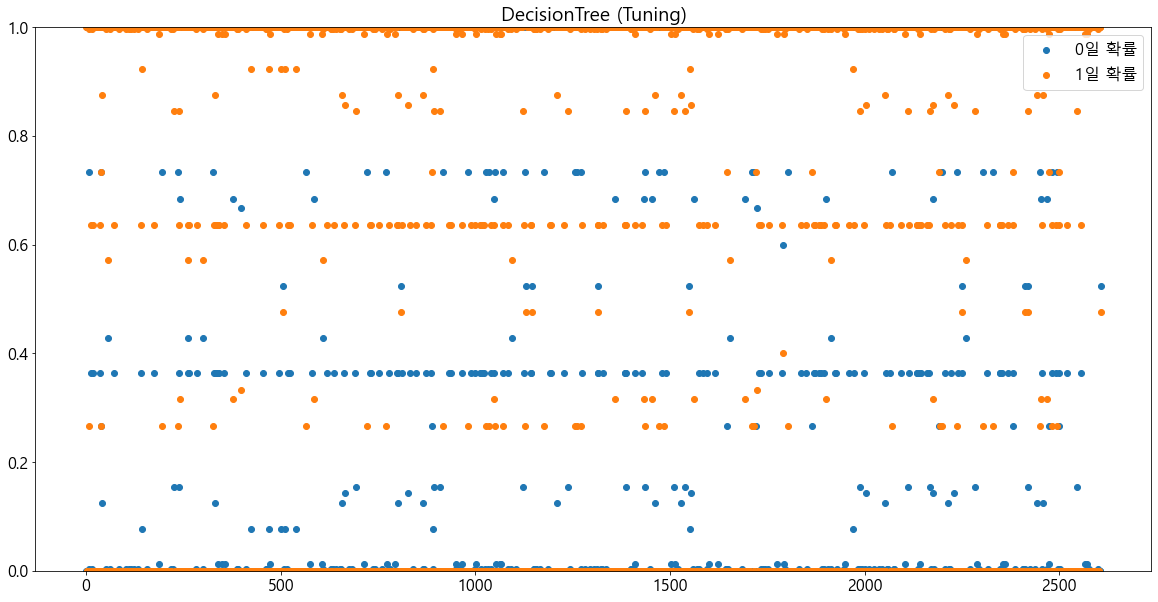

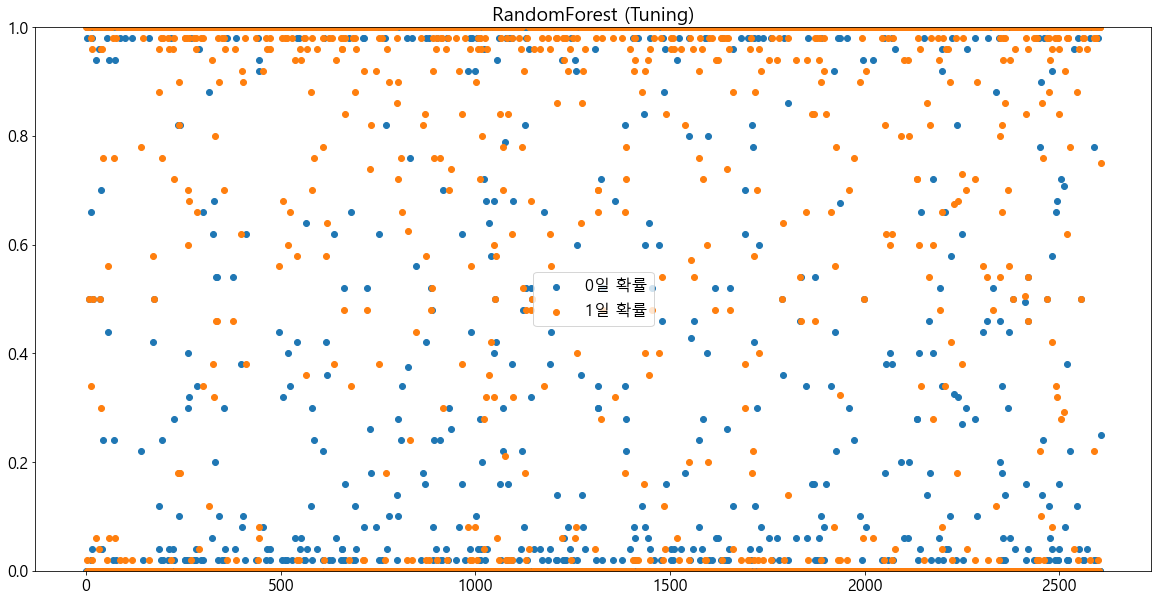

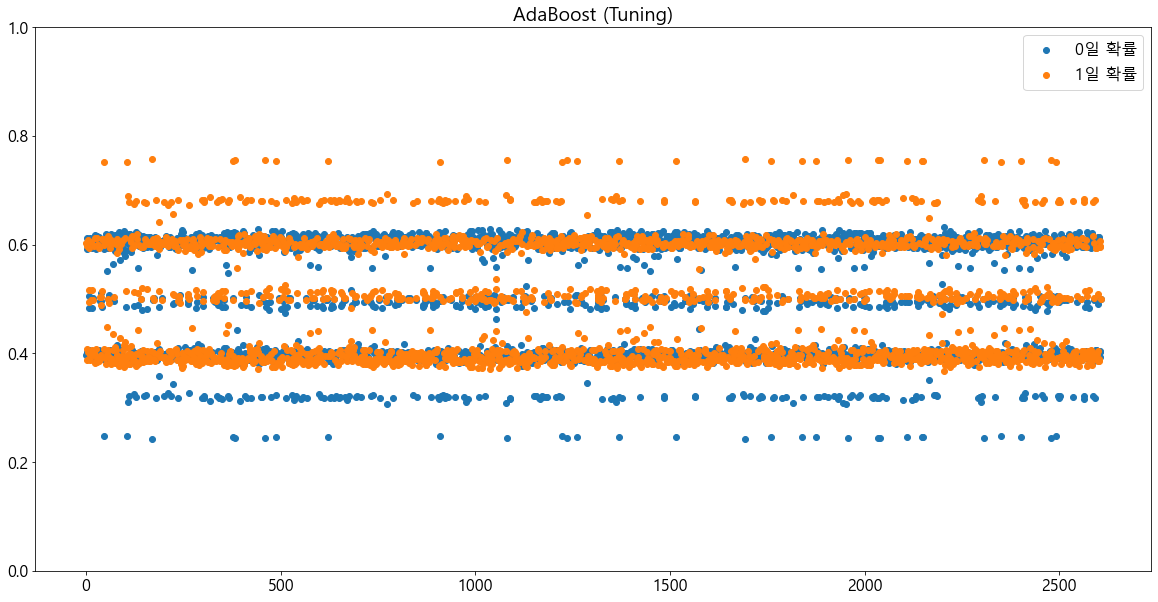

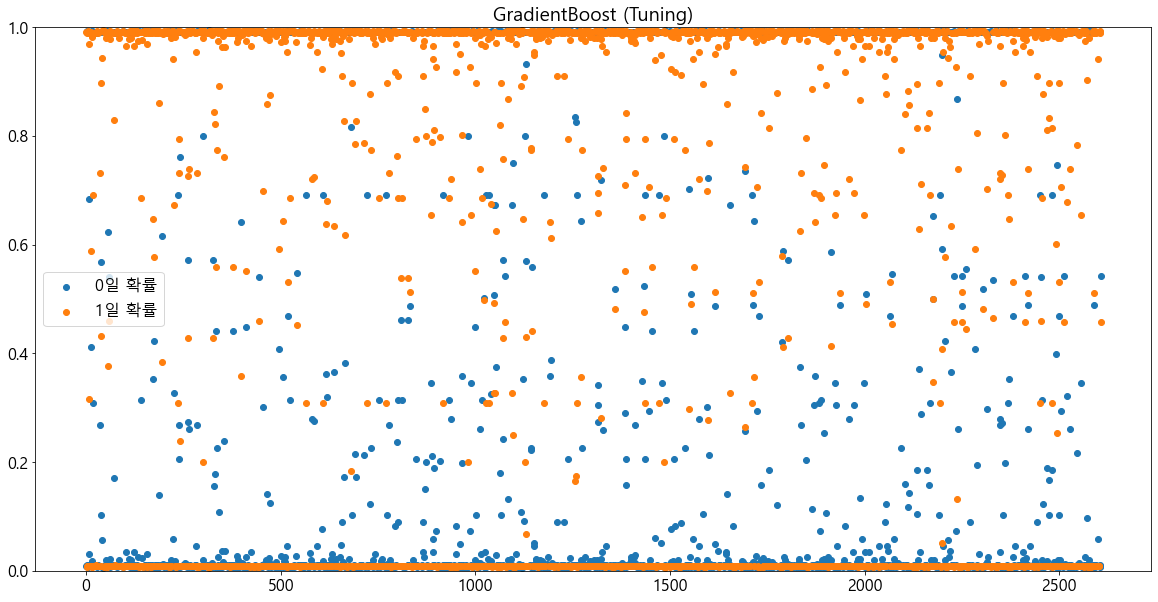

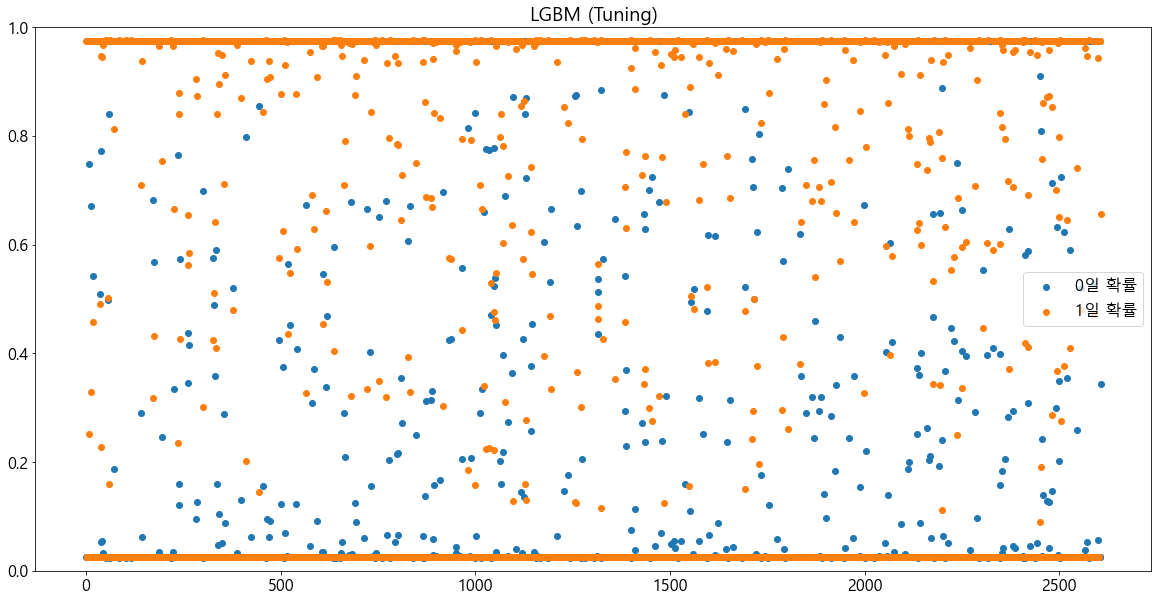

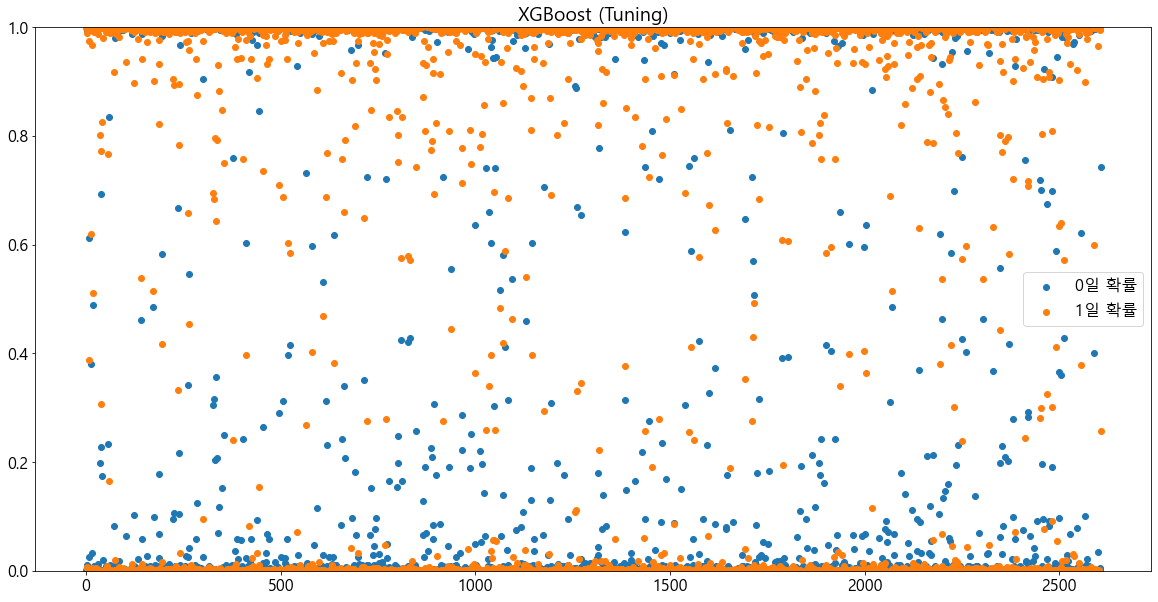

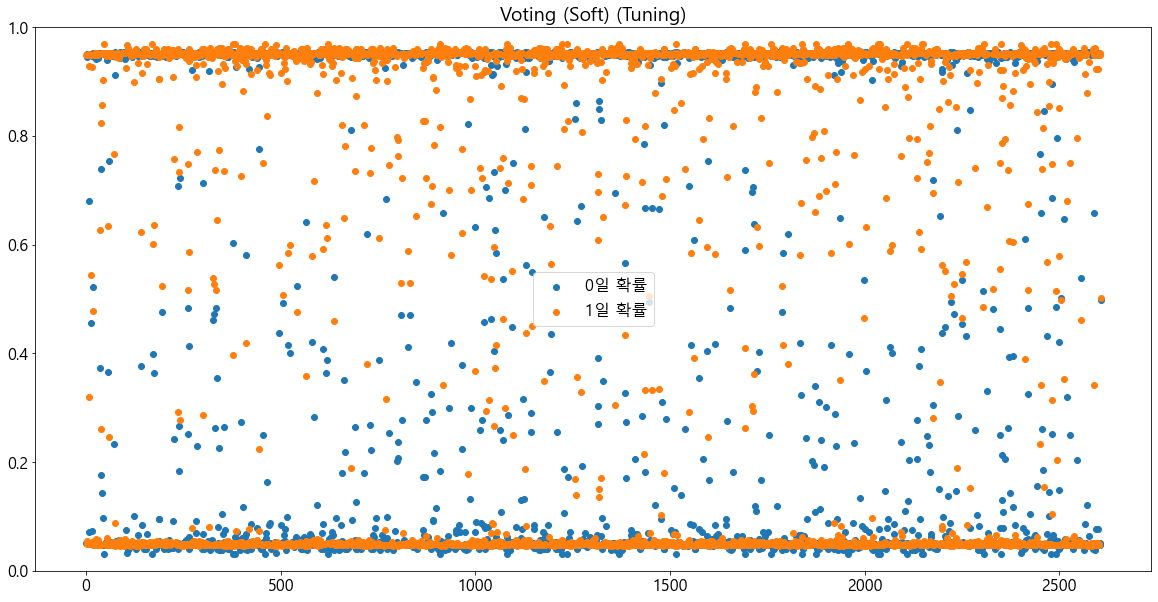

In [35]:
# 시각화 한다.
for idx, proba in enumerate(proba_list) :
    # hardVoting 은 제외(0...)
    if proba is None :
        continue
        
    # 0일 확률 값을 추출한다.
    a10 = proba[:, 0]
    # 1일 확률 값을 추출한다.
    a20 = proba[:, 1]
    
    plt.scatter(list(range(len(a10))), a10, label='0일 확률')
    plt.scatter(list(range(len(a20))), a20, label='1일 확률')
    plt.ylim(0, 1)
    plt.legend()
    plt.title(model_name_list[idx])
    plt.show()

In [36]:
# 모든 모델을 통해 예측 시간을 가져온다.
time_list=[]

for ml in best_model_list:
    # 시작 시간
    a1 = datetime.datetime.now()
    
    # 예측
    pred = ml.predict(X_test)
    
    # 종료 시간
    a2 = datetime.datetime.now()
    
    # 소요시간을 계산한다.
    a3 = a2 - a1
    time_list.append(a3.total_seconds())

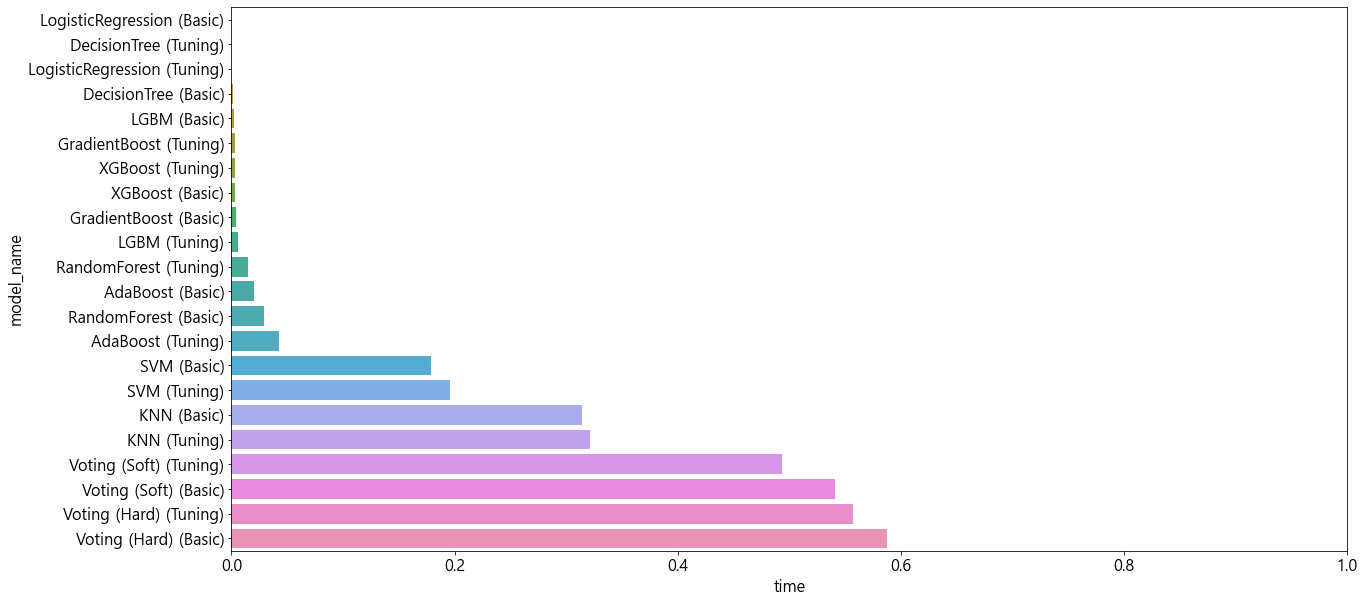

In [37]:
# 시각화
d100 = {
    'time' : time_list,
    'model_name' : model_name_list
}
df100 = pd.DataFrame(d100)
df100.sort_values(by='time', inplace=True)

sns.barplot(data=df100, x='time', y='model_name')
plt.xlim(0,1)
plt.show()

In [38]:
len(best_model_list)

22

In [52]:
best_model_list

[KNeighborsClassifier(),
 LogisticRegression(random_state=1),
 SVC(probability=True, random_state=1),
 DecisionTreeClassifier(random_state=1),
 RandomForestClassifier(random_state=1),
 AdaBoostClassifier(random_state=1),
 GradientBoostingClassifier(random_state=1),
 LGBMClassifier(random_state=1),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
               reg_alpha=0, reg_lambda=

In [61]:
best_model = best_model_list[19]
best_model

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=0,
              num_parallel_tree=None, predictor=None, random_state=1,
              reg_alpha=0, reg_lambda=0, ...)

In [62]:
# 선정된 모델에 전체 데이터를 학습한다.
best_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=0,
              num_parallel_tree=None, predictor=None, random_state=1,
              reg_alpha=0, reg_lambda=0, ...)

In [63]:
# 모델 저장
with open('./07_Model.dat', 'wb') as fp :
    pickle.dump(best_model, fp)
    pickle.dump(encoder1, fp)
    pickle.dump(encoder2, fp)
    pickle.dump(encoder3, fp)
    pickle.dump(encoder4, fp)
    pickle.dump(encoder5, fp)
    pickle.dump(encoder6, fp)
    pickle.dump(scaler1, fp)

### 에측

In [64]:
# 복원한다.
with open('./07_Model.dat','rb') as fp :
    model100 = pickle.load(fp)
    encoder100 = pickle.load(fp)
    encoder200 = pickle.load(fp)
    encoder300 = pickle.load(fp)
    encoder400 = pickle.load(fp)
    encoder500 = pickle.load(fp)
    encoder600 = pickle.load(fp)
    scaler100 = pickle.load(fp)
    
print(model100)
print(encoder100)
print(encoder200)
print(encoder300)
print(encoder400)
print(encoder500)
print(encoder600)
print(scaler100)

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=0,
              num_parallel_tree=None, predictor=None, random_state=1,
              reg_alpha=0, reg_lambda=0, ...)
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
StandardScaler()


In [65]:
# 예측한다.
pred = model100.predict(X2)
pred

array([1, 0, 1, ..., 1, 1, 1])

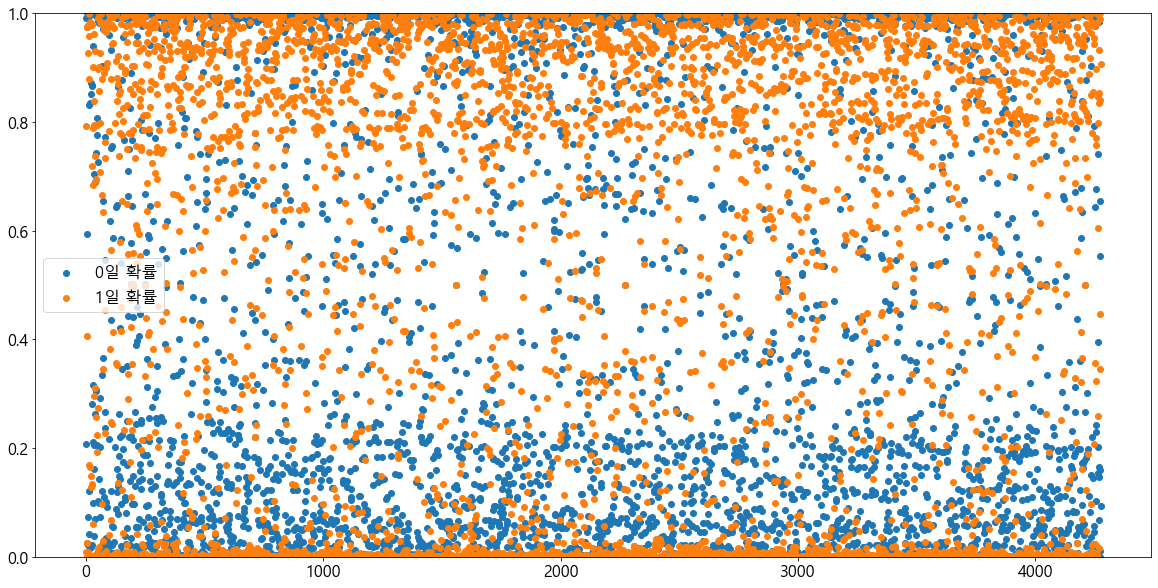

In [66]:
# 확률값을 구해 시각화 해본다.
proba = model100.predict_proba(X2)
a10 = proba[:, 0]
a20 = proba[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a20))), a20, label='1일 확률')
plt.legend()
plt.ylim(0, 1)
plt.show()

In [67]:
pred2 = encoder600.inverse_transform(pred)
pred2

array([ True, False,  True, ...,  True,  True,  True])

In [68]:
# 저장을 위해 데이터를 불러온다.
result_df = pd.read_csv('./data/test.csv')
# 결과 데이터를 붙히고 저장한다.
result_df['Transported'] = pred2
result_df.to_csv('./data/space_titanic_result.csv')